In [64]:
import sys
sys.path.append("..")

from server.optimisation.models import *
from server.optimisation.gen_data import *

def getTicksForDay(id):
    day = Day.model_validate({"day": id, "deferables": getDefDemands(id)})
    ticks = []
    for tick in range(TICKS_PER_DAY):
        sun = getSunlight(tick)
        demand = getInstDemand(id, tick)
        sell, buy = getPrice(id, tick)

        ticks.append(
            Tick.model_validate(
                {
                    "tick": tick,
                    "sun": sun,
                    "demand": demand,
                    "sell_price": sell,
                    "buy_price": buy,
                    "day": id,
                }
            )
        )
    return day, ticks

In [65]:
tick_data = []
for i in range(5000):
    _, tmp = getTicksForDay(143038273 + i)
    tick_data += [tick.buy_price for tick in tmp]

tick_data

[11,
 36,
 29,
 26,
 22,
 13,
 15,
 8,
 11,
 31,
 28,
 11,
 33,
 34,
 39,
 53,
 32,
 20,
 46,
 30,
 40,
 25,
 11,
 13,
 17,
 25,
 13,
 12,
 5,
 10,
 5,
 5,
 13,
 6,
 24,
 16,
 9,
 12,
 18,
 35,
 25,
 37,
 36,
 43,
 46,
 45,
 75,
 61,
 47,
 47,
 37,
 51,
 40,
 61,
 43,
 40,
 52,
 31,
 35,
 9,
 5,
 31,
 29,
 15,
 13,
 16,
 16,
 24,
 16,
 22,
 34,
 29,
 21,
 35,
 29,
 41,
 27,
 54,
 42,
 16,
 54,
 38,
 17,
 13,
 17,
 17,
 12,
 5,
 20,
 27,
 5,
 13,
 5,
 8,
 20,
 22,
 5,
 5,
 38,
 24,
 34,
 31,
 26,
 63,
 40,
 39,
 47,
 65,
 62,
 64,
 58,
 37,
 51,
 53,
 45,
 38,
 39,
 23,
 34,
 25,
 19,
 27,
 21,
 34,
 5,
 6,
 20,
 35,
 5,
 5,
 12,
 26,
 12,
 17,
 50,
 37,
 36,
 38,
 45,
 18,
 29,
 25,
 25,
 20,
 10,
 29,
 5,
 14,
 5,
 7,
 5,
 5,
 35,
 5,
 9,
 7,
 24,
 25,
 36,
 44,
 21,
 42,
 53,
 39,
 26,
 53,
 44,
 37,
 54,
 55,
 56,
 41,
 44,
 31,
 42,
 29,
 34,
 38,
 31,
 11,
 12,
 23,
 5,
 5,
 28,
 16,
 30,
 22,
 8,
 22,
 31,
 34,
 24,
 31,
 31,
 47,
 32,
 27,
 44,
 40,
 27,
 21,
 27,
 26,
 14,
 20,

In [66]:
# input = n previous price
# output is next price

n = 20

# each input = goup of n prices
# output = single value

def get_input(data, n):
    in_vals = []
    for i in range(len(data) - n):
        in_vals.append(data[i:i+n])

    return in_vals

def get_output(data, n):
    out_vals = []
    for i in range(n, len(data)):
        out_vals.append(data[i])
    
    return out_vals

In [68]:
in_vals = get_input(tick_data, n)
out_vals = get_output(tick_data, n)

print(len(in_vals), len(out_vals))

299980 299980


In [72]:
in_vals

[[11,
  36,
  29,
  26,
  22,
  13,
  15,
  8,
  11,
  31,
  28,
  11,
  33,
  34,
  39,
  53,
  32,
  20,
  46,
  30],
 [36,
  29,
  26,
  22,
  13,
  15,
  8,
  11,
  31,
  28,
  11,
  33,
  34,
  39,
  53,
  32,
  20,
  46,
  30,
  40],
 [29,
  26,
  22,
  13,
  15,
  8,
  11,
  31,
  28,
  11,
  33,
  34,
  39,
  53,
  32,
  20,
  46,
  30,
  40,
  25],
 [26,
  22,
  13,
  15,
  8,
  11,
  31,
  28,
  11,
  33,
  34,
  39,
  53,
  32,
  20,
  46,
  30,
  40,
  25,
  11],
 [22,
  13,
  15,
  8,
  11,
  31,
  28,
  11,
  33,
  34,
  39,
  53,
  32,
  20,
  46,
  30,
  40,
  25,
  11,
  13],
 [13,
  15,
  8,
  11,
  31,
  28,
  11,
  33,
  34,
  39,
  53,
  32,
  20,
  46,
  30,
  40,
  25,
  11,
  13,
  17],
 [15,
  8,
  11,
  31,
  28,
  11,
  33,
  34,
  39,
  53,
  32,
  20,
  46,
  30,
  40,
  25,
  11,
  13,
  17,
  25],
 [8,
  11,
  31,
  28,
  11,
  33,
  34,
  39,
  53,
  32,
  20,
  46,
  30,
  40,
  25,
  11,
  13,
  17,
  25,
  13],
 [11,
  31,
  28,
  11,
  33,
  34,
  39

In [71]:
out_vals

[40,
 25,
 11,
 13,
 17,
 25,
 13,
 12,
 5,
 10,
 5,
 5,
 13,
 6,
 24,
 16,
 9,
 12,
 18,
 35,
 25,
 37,
 36,
 43,
 46,
 45,
 75,
 61,
 47,
 47,
 37,
 51,
 40,
 61,
 43,
 40,
 52,
 31,
 35,
 9,
 5,
 31,
 29,
 15,
 13,
 16,
 16,
 24,
 16,
 22,
 34,
 29,
 21,
 35,
 29,
 41,
 27,
 54,
 42,
 16,
 54,
 38,
 17,
 13,
 17,
 17,
 12,
 5,
 20,
 27,
 5,
 13,
 5,
 8,
 20,
 22,
 5,
 5,
 38,
 24,
 34,
 31,
 26,
 63,
 40,
 39,
 47,
 65,
 62,
 64,
 58,
 37,
 51,
 53,
 45,
 38,
 39,
 23,
 34,
 25,
 19,
 27,
 21,
 34,
 5,
 6,
 20,
 35,
 5,
 5,
 12,
 26,
 12,
 17,
 50,
 37,
 36,
 38,
 45,
 18,
 29,
 25,
 25,
 20,
 10,
 29,
 5,
 14,
 5,
 7,
 5,
 5,
 35,
 5,
 9,
 7,
 24,
 25,
 36,
 44,
 21,
 42,
 53,
 39,
 26,
 53,
 44,
 37,
 54,
 55,
 56,
 41,
 44,
 31,
 42,
 29,
 34,
 38,
 31,
 11,
 12,
 23,
 5,
 5,
 28,
 16,
 30,
 22,
 8,
 22,
 31,
 34,
 24,
 31,
 31,
 47,
 32,
 27,
 44,
 40,
 27,
 21,
 27,
 26,
 14,
 20,
 15,
 21,
 5,
 11,
 8,
 5,
 5,
 11,
 12,
 5,
 17,
 21,
 26,
 24,
 33,
 34,
 47,
 54,
 45,
 55,
 57

In [73]:
# train and test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(get_input(tick_data, n), get_output(tick_data, n), test_size=0.2)

print(len(X_train), len(X_test), len(y_train), len(y_test))

239984 59996 239984 59996


In [74]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# torch.set_default_tensor_type(torch.DoubleTensor)

In [100]:
class Model(nn.Module):
    def __init__(self, in_f = 2, hl1 = 128, hl2 = 128, out=1):
        super().__init__()
        self.fc1 = nn.Linear(in_f, hl1)
        self.fc2 = nn.Linear(hl1, hl2)
        self.out = nn.Linear(hl2, out)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.out(x)


In [101]:
model = Model(in_f=n)

In [102]:
X_train_t = torch.FloatTensor(X_train)
y_train_t = torch.FloatTensor(y_train)

In [103]:
X_train_t

tensor([[19.,  5.,  5.,  ..., 39., 37., 65.],
        [24., 22., 50.,  ..., 21.,  5.,  5.],
        [54., 28., 45.,  ...,  5.,  5.,  6.],
        ...,
        [ 5.,  5.,  5.,  ..., 53., 74., 51.],
        [70., 51., 32.,  ...,  5., 14.,  8.],
        [35.,  5., 24.,  ..., 18., 49.,  5.]])

In [104]:
y_train_t

tensor([39.,  5.,  5.,  ..., 66., 15., 16.])

In [107]:
# set criterion to measure error
criterion = nn.CrossEntropyLoss()

# Adam Optimizer
# params = all the layers
# epoch = iteration -> sending data through the nn once
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [108]:
# training
epochs = 10000
losses = []

for i in range(epochs):
    # send data forward
    y_pred = model.forward(X_train_t).squeeze()
    print(y_train_t)
    print(y_pred)

    loss = criterion(y_pred, y_train_t)

    losses.append(loss.detach().numpy())

    print(f'epoch: {i} and loss: {loss}')

    # back propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

tensor([39.,  5.,  5.,  ..., 66., 15., 16.])
tensor([-1.6694, -3.1178, -3.0131,  ..., -1.5033, -2.8706, -2.3122],
       grad_fn=<SqueezeBackward0>)
epoch: 0 and loss: 79325600.0
tensor([39.,  5.,  5.,  ..., 66., 15., 16.])
tensor([-1.2747, -3.0213, -2.9235,  ..., -1.1402, -2.7334, -2.0060],
       grad_fn=<SqueezeBackward0>)
epoch: 1 and loss: 79361672.0
tensor([39.,  5.,  5.,  ..., 66., 15., 16.])
tensor([-1.6771, -3.1015, -2.9933,  ..., -1.4972, -2.8468, -2.3126],
       grad_fn=<SqueezeBackward0>)
epoch: 2 and loss: 79326016.0
tensor([39.,  5.,  5.,  ..., 66., 15., 16.])
tensor([-1.9257, -3.1425, -3.0251,  ..., -1.7244, -2.8981, -2.4941],
       grad_fn=<SqueezeBackward0>)
epoch: 3 and loss: 79351432.0
tensor([39.,  5.,  5.,  ..., 66., 15., 16.])
tensor([-1.9025, -3.1484, -3.0283,  ..., -1.7043, -2.9007, -2.4806],
       grad_fn=<SqueezeBackward0>)
epoch: 4 and loss: 79344864.0
tensor([39.,  5.,  5.,  ..., 66., 15., 16.])
tensor([-1.7538, -3.1368, -3.0159,  ..., -1.5703, -2.8777, -

KeyboardInterrupt: 

In [190]:
x = X_train[:100]
with torch.no_grad():
    y = model.forward(x)

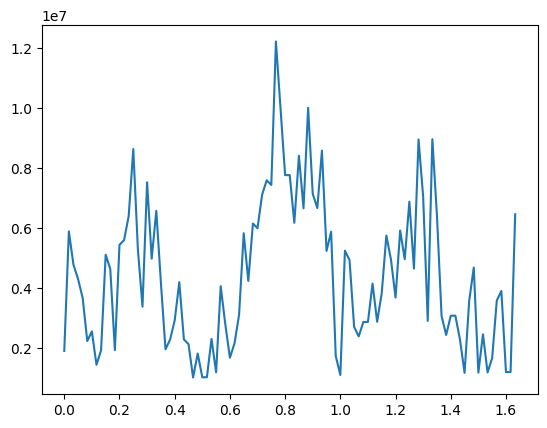

In [191]:
import matplotlib.pyplot as plt

new_x = [i[0] for i in x.numpy()]

# plt.plot([i[0] for i in x.numpy()], y.numpy())
plt.plot([i[0] for i in x.numpy()][:-1], y.numpy()[:-1])


# new_x

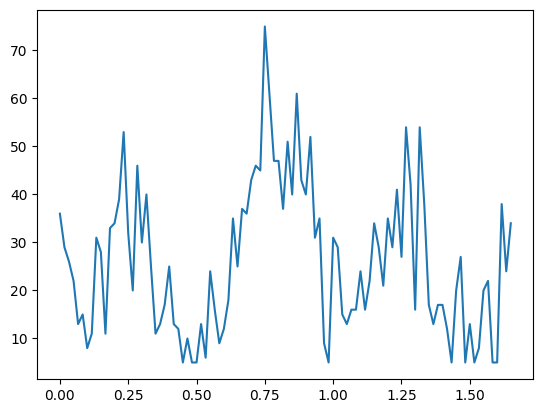

In [192]:
plt.plot([i[0] for i in x.numpy()], y_train[:100])